# Give Me Some Credit Project

### Source : https://www.kaggle.com/c/GiveMeSomeCredit

Author : Bastien Roques
&nbsp;

# Prepare Model

### Imports

In [1]:
# Import modules
from pandas import read_csv
from bigml.api import BigML
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import kaggle

## Datasets

In [2]:
# Import test and train datasets
df_train = pd.read_csv('https://oml-data.s3.amazonaws.com/kaggle-give-me-credit-train.csv')
df_test = pd.read_csv('https://oml-data.s3.amazonaws.com/kaggle-give-me-credit-test.csv')

### Create dataframes

In [3]:
df_train.head()

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
1,2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0
3,4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,5,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
SeriousDlqin2yrs                        150000 non-null int64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [5]:
df_train.describe()

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000,150000.000000
mean,75000.500000,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222,0.066840
std,43301.414527,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086,0.249746
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,112500.250000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,150000.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000


Observations: 
* min age = 0

In [6]:
df_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
Unnamed: 0                              101503 non-null int64
SeriousDlqin2yrs                        0 non-null float64
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           81400 non-null float64
NumberOfOpenCreditLinesAndLoans         101503 non-null int64
NumberOfTimes90DaysLate                 101503 non-null int64
NumberRealEstateLoansOrLines            101503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    101503 non-null int64
NumberOfDependents                      98877 non-null float64
dtypes: float64(5), int64(7)
memory usage: 9.3 MB


In [8]:
df_test.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


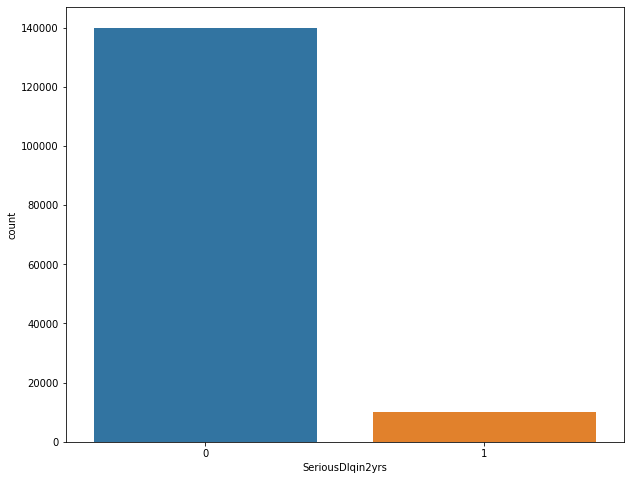

In [9]:
plt.figure(figsize=(10,8))
sn.countplot("SeriousDlqin2yrs", data=df_train)

In [10]:
class_0 = df_train.SeriousDlqin2yrs.value_counts()[0]
class_1 = df_train.SeriousDlqin2yrs.value_counts()[1]
print("Total number of class_0: {}".format(class_0))
print("Total number of class_1: {}".format(class_1))
print("Event rate: {} %".format(class_1/(class_0+class_1) *100))

Total number of class_0: 139974
Total number of class_1: 10026
Event rate: 6.683999999999999 %


### Create dataframes

In [11]:
# Create a list dataframes
dataframes = [df_train, df_test]

In [12]:
# Define column Id
for df in dataframes:
    df.rename( columns={'Unnamed: 0' :'Id'}, inplace=True )

In [13]:
# Less than legal age
df_train.loc[df_train["age"] < 18] 

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
65695,65696,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0,0


In [14]:
for df in dataframes:
    
    # Age
    df.loc[df["age"] == 0, "age"] = df.age.median()
    df.loc[df.age > 65, 'Senior'] = '1' 
    df.loc[df.age <= 65, 'Senior'] = '0'
    age_working = df.loc[(df["age"] >= 18) & (df["age"] < 65)]
    age_senior = df.loc[(df["age"] >= 65)]
    age_working_impute = age_working.MonthlyIncome.mean()
    age_senior_impute = age_senior.MonthlyIncome.mean()
    
    # MonthlyIncome
    df["MonthlyIncome"] = df["MonthlyIncome"].fillna(99999)
    df.loc[((df["age"] >= 18) & (df["age"] < 65)) & (df["MonthlyIncome"] == 99999), "MonthlyIncome"] = age_working_impute
    df.loc[(df["age"] >= 65) & (df["MonthlyIncome"] == 99999), "MonthlyIncome"] = age_senior_impute
    
    # Income Per Person
    df['IncomePerPerson'] = df['MonthlyIncome'] / ( df['NumberOfDependents'] + 1 )
    
    # Defaults
    df['CombinedDefaulted'] = (df['NumberOfTime30-59DaysPastDueNotWorse'] + \
                               df['NumberOfTime60-89DaysPastDueNotWorse'] + \
                               df['NumberOfTimes90DaysLate'])
        
    # Credit & Loans
    df["CombinedCreditLoans"] = df["NumberOfOpenCreditLinesAndLoans"] + \
                                df["NumberRealEstateLoansOrLines"]
    
    # Monthly Debt
    df['MonthlyDebt'] = df['DebtRatio'] * df['MonthlyIncome']
    
    # Monthly Balance
    df['MonthlyBalance'] = df['MonthlyIncome'] - df['MonthlyDebt']
    
    # Dependents
    df['NumberOfDependents'] = df['NumberOfDependents'].fillna(0)
    df["NumberOfDependents"] = df["NumberOfDependents"].astype('int64')

In [15]:
df_train.head()

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs,Senior,IncomePerPerson,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance
0,1,0.766127,45.0,2,0.802982,9120.0,13,0,6,0,2,1,0,3040.0,2,19,7323.197016,1796.802984
1,2,0.957151,40.0,0,0.121876,2600.0,4,0,0,0,1,0,0,1300.0,0,4,316.878123,2283.121877
2,3,0.658180,38.0,1,0.085113,3042.0,2,1,0,0,0,0,0,3042.0,2,2,258.914887,2783.085113
3,4,0.233810,30.0,0,0.036050,3300.0,5,0,0,0,0,0,0,3300.0,0,5,118.963951,3181.036049
4,5,0.907239,49.0,1,0.024926,63588.0,7,0,1,0,0,0,0,63588.0,1,8,1584.975094,62003.024906


In [16]:
df_test.head()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Senior,IncomePerPerson,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance
0,1,NaN,0.885519,43.0,0,0.177513,5700.0,4,0,0,0,0,0,5700.000000,0,4,1011.822487,4688.177513
1,2,NaN,0.463295,57.0,0,0.527237,9141.0,15,0,4,0,2,0,3047.000000,0,19,4819.472759,4321.527241
2,3,NaN,0.043275,59.0,0,0.687648,5083.0,12,0,1,0,2,0,1694.333333,0,13,3495.312354,1587.687646
3,4,NaN,0.280308,38.0,1,0.925961,3200.0,7,0,2,0,0,0,3200.000000,1,9,2963.074038,236.925962
4,5,NaN,1.000000,27.0,0,0.019917,3865.0,4,0,0,0,1,0,1932.500000,0,4,76.980082,3788.019918


### Export dataframes to csv

In [17]:
# Export df_train and df_test to Csv
df_train.to_csv('csv/Train.csv', index=False)
df_test.to_csv('csv/Test.csv', index=False)

# Train Model

In [18]:
# Select project in BigML
api = BigML(project='project/5d9b851042129f40b70001b0')

### Sources

In [19]:
# Create sources
src_train = api.create_source('csv/Train.csv')
src_test = api.create_source('csv/Test.csv')

In [20]:
api.ok(src_train)
api.ok(src_test)

True

### Datasets

In [21]:
# Create dataset
dataset_args = {"name": "Train Full"}
dataset_train = api.create_dataset(src_train, dataset_args)
dataset_test_args = {"name": "Test"}
dataset_test = api.create_dataset(src_test, dataset_test_args)

In [22]:
# Split train dataset
train_dataset = api.create_dataset(
    dataset_train, {"name": "Train (80%)",
                     "sample_rate": 0.8, "seed": "my seed"})
val_dataset = api.create_dataset(
    dataset_train, {"name": "Val (20%)",
                     "sample_rate": 0.8, "seed": "my seed",
                     "out_of_bag": True})

In [23]:
# Create model ensemble
ensemble_args = {"objective_field": "SeriousDlqin2yrs"}
ensemble = api.create_ensemble(train_dataset, ensemble_args)

### Batch prediction

In [24]:
batch_prediction = api.create_batch_prediction(ensemble, val_dataset,
                                               {"all_fields": True})

In [25]:
api.ok(batch_prediction)

True

In [26]:
api.download_batch_prediction(batch_prediction,
                              filename='csv/predictions_train_with_val.csv')

'csv/predictions_train_with_val.csv'

In [27]:
batch_prediction_evaluation = api.create_batch_prediction(ensemble, val_dataset,
                                               {"all_fields": True, 
                                                "header": True,
                                                "confidence": True,
                                                "probabilities": True})

In [28]:
api.ok(batch_prediction_evaluation)

True

In [29]:
api.download_batch_prediction(batch_prediction_evaluation,
                              filename='csv/my_predictions_evaluation.csv')

'csv/my_predictions_evaluation.csv'

# Evaluate model

In [30]:
df_evaluation_with_proba = read_csv('csv/my_predictions_evaluation.csv')
#df_evaluation_with_proba.rename(columns={"SeriousDlqin2yrs": "SeriousDlqin2yrs_Actual", "SeriousDlqin2yrs.1": "SeriousDlqin2yrs_Predicted"})

df_evaluation_with_proba.head()

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,Senior,IncomePerPerson,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance,SeriousDlqin2yrs.1,confidence,0 probability,1 probability
0,5,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,0,63588.0,1,8,1584.975094,62003.024906,0,0.72118,0.79219,0.20781
1,20,0.602794,25,0,0.065868,333.0,2,0,0,0,...,0,333.0,0,2,21.934132,311.065868,0,0.92199,0.94990,0.05011
2,27,0.052436,58,0,0.097672,8333.0,22,0,1,0,...,0,8333.0,0,23,813.902326,7519.097674,0,0.98379,0.99050,0.00950
3,28,0.034421,69,0,0.042383,2500.0,17,0,0,0,...,1,1250.0,0,17,105.957617,2394.042382,0,0.98454,0.99129,0.00871
4,31,0.704074,28,1,0.155201,4200.0,8,0,0,0,...,0,4200.0,1,8,651.844801,3548.155199,0,0.83925,0.86418,0.13582


In [33]:
df_evaluation_with_proba.rename(columns = {list(df_evaluation_with_proba)[11]:'SeriousDlqin2yrs_Actual'}, inplace=True)
df_evaluation_with_proba.rename(columns = {list(df_evaluation_with_proba)[18]:'SeriousDlqin2yrs_Predicted'}, inplace=True)
df_evaluation_with_proba

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,Senior,IncomePerPerson,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability
0,5,0.907239,49,1,0.024926,63588.000000,7,0,1,0,...,0,63588.000000,1,8,1.584975e+03,6.200302e+04,0,0.72118,0.79219,0.20781
1,20,0.602794,25,0,0.065868,333.000000,2,0,0,0,...,0,333.000000,0,2,2.193413e+01,3.110659e+02,0,0.92199,0.94990,0.05011
2,27,0.052436,58,0,0.097672,8333.000000,22,0,1,0,...,0,8333.000000,0,23,8.139023e+02,7.519098e+03,0,0.98379,0.99050,0.00950
3,28,0.034421,69,0,0.042383,2500.000000,17,0,0,0,...,1,1250.000000,0,17,1.059576e+02,2.394042e+03,0,0.98454,0.99129,0.00871
4,31,0.704074,28,1,0.155201,4200.000000,8,0,0,0,...,0,4200.000000,1,8,6.518448e+02,3.548155e+03,0,0.83925,0.86418,0.13582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,149964,0.230353,61,0,883.000000,6759.138224,15,0,0,0,...,0,2253.046075,0,15,5.968319e+06,-5.961560e+06,0,0.96823,0.97838,0.02162
29996,149972,0.058001,83,0,0.013997,5000.000000,6,0,0,0,...,1,5000.000000,0,6,6.998601e+01,4.930014e+03,0,0.99506,0.99683,0.00317
29997,149976,0.022088,58,0,2716.000000,6759.138224,8,0,2,0,...,0,6759.138224,0,10,1.835782e+07,-1.835106e+07,0,0.99391,0.99619,0.00381
29998,149986,0.954409,26,0,0.324962,1950.000000,4,0,0,0,...,0,1950.000000,0,4,6.336750e+02,1.316325e+03,0,0.90537,0.92436,0.07564


## Confusion matrix

In [34]:
# Create column Error 
df_evaluation_with_proba['Error'] = ""
df_evaluation_with_proba

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,IncomePerPerson,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error
0,5,0.907239,49,1,0.024926,63588.000000,7,0,1,0,...,63588.000000,1,8,1.584975e+03,6.200302e+04,0,0.72118,0.79219,0.20781,
1,20,0.602794,25,0,0.065868,333.000000,2,0,0,0,...,333.000000,0,2,2.193413e+01,3.110659e+02,0,0.92199,0.94990,0.05011,
2,27,0.052436,58,0,0.097672,8333.000000,22,0,1,0,...,8333.000000,0,23,8.139023e+02,7.519098e+03,0,0.98379,0.99050,0.00950,
3,28,0.034421,69,0,0.042383,2500.000000,17,0,0,0,...,1250.000000,0,17,1.059576e+02,2.394042e+03,0,0.98454,0.99129,0.00871,
4,31,0.704074,28,1,0.155201,4200.000000,8,0,0,0,...,4200.000000,1,8,6.518448e+02,3.548155e+03,0,0.83925,0.86418,0.13582,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,149964,0.230353,61,0,883.000000,6759.138224,15,0,0,0,...,2253.046075,0,15,5.968319e+06,-5.961560e+06,0,0.96823,0.97838,0.02162,
29996,149972,0.058001,83,0,0.013997,5000.000000,6,0,0,0,...,5000.000000,0,6,6.998601e+01,4.930014e+03,0,0.99506,0.99683,0.00317,
29997,149976,0.022088,58,0,2716.000000,6759.138224,8,0,2,0,...,6759.138224,0,10,1.835782e+07,-1.835106e+07,0,0.99391,0.99619,0.00381,
29998,149986,0.954409,26,0,0.324962,1950.000000,4,0,0,0,...,1950.000000,0,4,6.336750e+02,1.316325e+03,0,0.90537,0.92436,0.07564,


In [35]:
# Define values for column Error
def error_values(row):
    actual = row['SeriousDlqin2yrs_Actual']
    predicted = row['SeriousDlqin2yrs_Predicted']
    if actual == 1 and actual == predicted:
        row['Error'] = "TP"
    elif actual == 1 and predicted == 0:
        row['Error'] = "FN"
    elif actual == 0 and predicted == 1:
        row['Error'] = "FP"
    else:
        row['Error'] = "TN"
    return row['Error']


In [36]:
# Insert values in column Error
df_evaluation_with_proba['Error'] = df_evaluation_with_proba.apply(error_values, axis=1)
df_evaluation_with_proba
df_evaluation_with_proba.to_csv('csv/eval_with_proba.csv', index=False)

In [37]:
# Count TP, FN, FP, TN
df_evaluation_with_proba.groupby(['Error']).Error.count()

Error
FN     1682
FP      254
TN    27731
TP      333
Name: Error, dtype: int64

In [38]:
# Count TP, FN, FP, TN
df_evaluation_with_proba.groupby(['Error']).Error.count()
total_errors = df_evaluation_with_proba.groupby(['Error']).Error.count()

In [39]:
df_evaluation_with_proba

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,IncomePerPerson,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error
0,5,0.907239,49,1,0.024926,63588.000000,7,0,1,0,...,63588.000000,1,8,1.584975e+03,6.200302e+04,0,0.72118,0.79219,0.20781,TN
1,20,0.602794,25,0,0.065868,333.000000,2,0,0,0,...,333.000000,0,2,2.193413e+01,3.110659e+02,0,0.92199,0.94990,0.05011,TN
2,27,0.052436,58,0,0.097672,8333.000000,22,0,1,0,...,8333.000000,0,23,8.139023e+02,7.519098e+03,0,0.98379,0.99050,0.00950,TN
3,28,0.034421,69,0,0.042383,2500.000000,17,0,0,0,...,1250.000000,0,17,1.059576e+02,2.394042e+03,0,0.98454,0.99129,0.00871,TN
4,31,0.704074,28,1,0.155201,4200.000000,8,0,0,0,...,4200.000000,1,8,6.518448e+02,3.548155e+03,0,0.83925,0.86418,0.13582,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,149964,0.230353,61,0,883.000000,6759.138224,15,0,0,0,...,2253.046075,0,15,5.968319e+06,-5.961560e+06,0,0.96823,0.97838,0.02162,TN
29996,149972,0.058001,83,0,0.013997,5000.000000,6,0,0,0,...,5000.000000,0,6,6.998601e+01,4.930014e+03,0,0.99506,0.99683,0.00317,TN
29997,149976,0.022088,58,0,2716.000000,6759.138224,8,0,2,0,...,6759.138224,0,10,1.835782e+07,-1.835106e+07,0,0.99391,0.99619,0.00381,TN
29998,149986,0.954409,26,0,0.324962,1950.000000,4,0,0,0,...,1950.000000,0,4,6.336750e+02,1.316325e+03,0,0.90537,0.92436,0.07564,TN


### Filter errors

In [40]:
# Select only FP and FN values for column Error
FP_or_FN = (df_evaluation_with_proba['Error'] == 'FN') | (df_evaluation_with_proba['Error'] == 'FP')

# Create new df with only FP and FN values for column Error
df_error = df_evaluation_with_proba.loc[FP_or_FN]
df_error

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,IncomePerPerson,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error
11,89,0.734478,45,0,0.591478,4716.0,13,0,2,0,...,1572.000000,0,15,2789.408522,1926.591478,0,0.84879,0.87469,0.12531,FN
30,227,1.953488,38,0,0.153500,3556.0,5,0,0,0,...,1185.333333,0,5,545.846501,3010.153499,0,0.74143,0.79892,0.20108,FN
34,241,0.973339,61,1,0.209962,5500.0,11,0,0,1,...,2750.000000,2,11,1154.790037,4345.209963,0,0.67672,0.70998,0.29002,FN
57,335,0.037198,47,0,0.039758,25000.0,11,0,1,0,...,6250.000000,0,12,993.960250,24006.039750,0,0.98715,0.99155,0.00845,FN
60,353,0.507973,69,2,0.193935,3000.0,10,2,0,2,...,3000.000000,6,10,581.806065,2418.193935,1,0.58923,0.36774,0.63226,FP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29878,149396,0.844279,76,3,0.125373,2009.0,14,2,0,0,...,2009.000000,5,14,251.874626,1757.125374,1,0.51799,0.43439,0.56562,FP
29881,149439,0.705074,35,0,0.114565,3377.0,5,0,0,0,...,844.250000,0,5,386.885434,2990.114566,0,0.92091,0.93955,0.06045,FN
29908,149559,0.837702,66,0,0.935768,5666.0,14,0,3,0,...,5666.000000,0,17,5302.064230,363.935770,0,0.89495,0.92095,0.07905,FN
29929,149665,0.840021,54,0,0.904777,3181.0,10,0,3,0,...,3181.000000,0,13,2878.095223,302.904777,0,0.86964,0.90008,0.09992,FN


In [41]:
df_error.assign(Probability = '')

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error,Probability
11,89,0.734478,45,0,0.591478,4716.0,13,0,2,0,...,0,15,2789.408522,1926.591478,0,0.84879,0.87469,0.12531,FN,
30,227,1.953488,38,0,0.153500,3556.0,5,0,0,0,...,0,5,545.846501,3010.153499,0,0.74143,0.79892,0.20108,FN,
34,241,0.973339,61,1,0.209962,5500.0,11,0,0,1,...,2,11,1154.790037,4345.209963,0,0.67672,0.70998,0.29002,FN,
57,335,0.037198,47,0,0.039758,25000.0,11,0,1,0,...,0,12,993.960250,24006.039750,0,0.98715,0.99155,0.00845,FN,
60,353,0.507973,69,2,0.193935,3000.0,10,2,0,2,...,6,10,581.806065,2418.193935,1,0.58923,0.36774,0.63226,FP,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29878,149396,0.844279,76,3,0.125373,2009.0,14,2,0,0,...,5,14,251.874626,1757.125374,1,0.51799,0.43439,0.56562,FP,
29881,149439,0.705074,35,0,0.114565,3377.0,5,0,0,0,...,0,5,386.885434,2990.114566,0,0.92091,0.93955,0.06045,FN,
29908,149559,0.837702,66,0,0.935768,5666.0,14,0,3,0,...,0,17,5302.064230,363.935770,0,0.89495,0.92095,0.07905,FN,
29929,149665,0.840021,54,0,0.904777,3181.0,10,0,3,0,...,0,13,2878.095223,302.904777,0,0.86964,0.90008,0.09992,FN,


In [42]:
def add_proba(row):

    if row['Error'] == "FP":
        row['Probability'] = row['1 probability'] 
    else:
        row['Probability'] = row['0 probability'] 
    
    return row['Probability']

In [43]:
df_error.loc[:, ('Probability')] = df_error.apply(add_proba, axis=1)
df_error

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error,Probability
11,89,0.734478,45,0,0.591478,4716.0,13,0,2,0,...,0,15,2789.408522,1926.591478,0,0.84879,0.87469,0.12531,FN,0.87469
30,227,1.953488,38,0,0.153500,3556.0,5,0,0,0,...,0,5,545.846501,3010.153499,0,0.74143,0.79892,0.20108,FN,0.79892
34,241,0.973339,61,1,0.209962,5500.0,11,0,0,1,...,2,11,1154.790037,4345.209963,0,0.67672,0.70998,0.29002,FN,0.70998
57,335,0.037198,47,0,0.039758,25000.0,11,0,1,0,...,0,12,993.960250,24006.039750,0,0.98715,0.99155,0.00845,FN,0.99155
60,353,0.507973,69,2,0.193935,3000.0,10,2,0,2,...,6,10,581.806065,2418.193935,1,0.58923,0.36774,0.63226,FP,0.63226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29878,149396,0.844279,76,3,0.125373,2009.0,14,2,0,0,...,5,14,251.874626,1757.125374,1,0.51799,0.43439,0.56562,FP,0.56562
29881,149439,0.705074,35,0,0.114565,3377.0,5,0,0,0,...,0,5,386.885434,2990.114566,0,0.92091,0.93955,0.06045,FN,0.93955
29908,149559,0.837702,66,0,0.935768,5666.0,14,0,3,0,...,0,17,5302.064230,363.935770,0,0.89495,0.92095,0.07905,FN,0.92095
29929,149665,0.840021,54,0,0.904777,3181.0,10,0,3,0,...,0,13,2878.095223,302.904777,0,0.86964,0.90008,0.09992,FN,0.90008


In [44]:
df_error.sort_values(by = 'Probability', ascending=False, inplace=True)
df_error

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error,Probability
25634,128521,0.009786,78,0,9.000000,6277.341638,2,0,0,0,...,0,2,5.649607e+04,-5.021873e+04,0,0.99580,0.99747,0.00254,FN,0.99747
4536,22960,0.012144,69,0,3120.000000,6277.341638,10,0,1,0,...,0,11,1.958531e+07,-1.957903e+07,0,0.99514,0.99740,0.00260,FN,0.99740
3596,18375,0.003510,49,0,0.000174,11482.000000,2,0,0,0,...,0,2,1.999831e+00,1.148000e+04,0,0.99458,0.99726,0.00275,FN,0.99726
1610,8399,0.026069,70,0,2673.000000,6277.341638,11,0,2,0,...,0,13,1.677933e+07,-1.677306e+07,0,0.99403,0.99654,0.00346,FN,0.99654
2732,13959,0.108742,62,0,0.060387,7600.000000,12,0,0,0,...,0,12,4.589396e+02,7.141060e+03,0,0.99339,0.99623,0.00377,FN,0.99623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7869,39254,1.051793,38,2,0.332022,1779.000000,2,1,0,0,...,3,2,5.906680e+02,1.188332e+03,1,0.44995,0.49771,0.50229,FP,0.50229
14218,70621,1.000000,33,1,60.000000,6759.138224,0,1,0,2,...,4,0,4.055483e+05,-3.987892e+05,0,0.44822,0.50163,0.49837,FN,0.50163
12513,62373,1.000000,37,1,0.067435,2950.000000,3,2,0,0,...,3,3,1.989326e+02,2.751067e+03,1,0.44639,0.49892,0.50108,FP,0.50108
6610,33341,1.000000,48,1,128.000000,6759.138224,2,2,0,0,...,3,2,8.651697e+05,-8.584106e+05,1,0.44891,0.49896,0.50104,FP,0.50104


### Extract 100 biggest errors

In [45]:
df_error_100 = df_error.head(100)
df_error_100.to_csv('csv/100_biggest_errors.csv')

### Cost matrix

In [46]:
# Costs are calculated
cout_fn = total_errors['FN'] * (-500)
cout_fp = total_errors['FP'] * (-2500)
cout_tn = total_errors['TN'] * 500
cout_tp = total_errors['TP'] * 0

print('FN :',cout_fn) 
print('FP :',cout_fp) 
print('TN :',cout_tn)
print('TP :',cout_tp)

FN : -841000
FP : -635000
TN : 13865500
TP : 0


In [47]:
gain = cout_fn + cout_fp + cout_tn + cout_tp
gain

12389500

In [48]:
def cost_threshold(threshold):
    prediction_threshold = df_evaluation_with_proba['1 probability'] > threshold

    is_P_pred = prediction_threshold
    is_N_pred = ~prediction_threshold

    is_P_real = (df_evaluation_with_proba['SeriousDlqin2yrs_Actual'] == 1)
    is_N_real = (df_evaluation_with_proba['SeriousDlqin2yrs_Actual'] == 0)

    TP = len(df_evaluation_with_proba.loc[is_P_pred & is_P_real])
    TN = len(df_evaluation_with_proba.loc[is_N_pred & is_N_real])
    FP = len(df_evaluation_with_proba.loc[is_P_pred & is_N_real])
    FN = len(df_evaluation_with_proba.loc[is_N_pred & is_P_real])

    TP_cost = 0
    FN_cost = -2500
    FP_cost = -500
    TN_cost = 500

    cost = TP * TP_cost
    cost += TN * TN_cost
    cost += FP * FP_cost
    cost += FN * FN_cost

    return cost

#### We create the graph

<function matplotlib.pyplot.show(*args, **kw)>

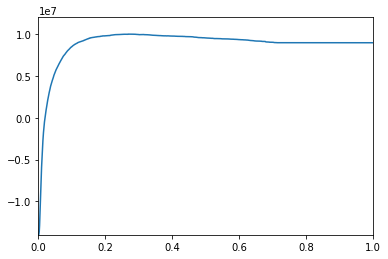

In [49]:

table = [cost_threshold(n/3000) for n in range(0,3000)]
threshold = [n/3000 for n in range(0,3000)]
plt.axis([0, 1,min(table),1.2*max(table)])
plt.plot(threshold, table)
plt.show

In [50]:
max_val = max(table)
max_threshold = table.index(max_val)/3000
print(f'Le gain maximum est {max_val} et il est obtenu en {max_threshold}')

Le gain maximum est 9990000 et il est obtenu en 0.26766666666666666


# Analyse 100 biggest errors

   * 100% have no NumberOfTimes30DaysOrLater
   * 75% More than 6 NumberOfOpenCreditLinesAndLoans
   * 80% ont plus de 40 years old
   * 60% ont plus de 50 years old 
   * 20% had 0 in MontlyIncome et and had been updated with 0.3 in DebtRatio
      * include 50% have > 0.3 in DebtRatio

### Create function for calculate AUC

In [51]:
df_evaluation_with_proba.head()

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,IncomePerPerson,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error
0,5,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,63588.0,1,8,1584.975094,62003.024906,0,0.72118,0.79219,0.20781,TN
1,20,0.602794,25,0,0.065868,333.0,2,0,0,0,...,333.0,0,2,21.934132,311.065868,0,0.92199,0.94990,0.05011,TN
2,27,0.052436,58,0,0.097672,8333.0,22,0,1,0,...,8333.0,0,23,813.902326,7519.097674,0,0.98379,0.99050,0.00950,TN
3,28,0.034421,69,0,0.042383,2500.0,17,0,0,0,...,1250.0,0,17,105.957617,2394.042382,0,0.98454,0.99129,0.00871,TN
4,31,0.704074,28,1,0.155201,4200.0,8,0,0,0,...,4200.0,1,8,651.844801,3548.155199,0,0.83925,0.86418,0.13582,TN


In [52]:
def calculate_auc():
    p = df_evaluation_with_proba.loc[df_evaluation_with_proba['SeriousDlqin2yrs_Actual'] == 1]
    n = df_evaluation_with_proba.loc[df_evaluation_with_proba['SeriousDlqin2yrs_Actual'] == 0]

    x_sup_y = 0
    total_combinations = 0
    
    for threshold_p in p['1 probability']:
        for threshold_n in n['1 probability']:
            if threshold_p > threshold_n:
                x_sup_y += 1
            total_combinations += 1
    auc = x_sup_y/total_combinations
    return auc            

In [53]:
print(f'AUC: {calculate_auc()}')

AUC: 0.8562081689455224


## Evaluate model with test set

In [54]:
evaluation = api.create_evaluation(ensemble, val_dataset)

In [55]:
api.ok(evaluation)

True

### AUC

In [56]:
# Calculate AUC
AUC : api.pprint(evaluation['object']['result']['model']['average_area_under_roc_curve'])

0.8564


In [57]:
ensemble_args = {"objective_field": "SeriousDlqin2yrs"}
ensemble = api.create_ensemble(train_dataset, ensemble_args)

In [58]:
batch_prediction = api.create_batch_prediction(ensemble, dataset_test,
                                               {"output_fields": ["Id"], "probabilities": True})


In [59]:
api.ok(batch_prediction)

True

In [60]:
api.download_batch_prediction(batch_prediction,
                              filename='csv/predictions_train_with_test.csv')


'csv/predictions_train_with_test.csv'

## Kaggle

In [61]:
! cp kaggle.json ~/.kaggle/

In [62]:
! chmod 600 ~/.kaggle/kaggle.json

In [63]:
! ls ~/.kaggle

kaggle.json


### Create submission file

In [64]:
df_kaggle = read_csv('csv/predictions_train_with_test.csv')
df_kaggle = df_kaggle.drop(["SeriousDlqin2yrs", "0 probability"], axis=1)
df_kaggle = df_kaggle.rename(columns={"1 probability": "Probability"})
df_kaggle.head()


,Id,Probability
0,1,0.07263
1,2,0.04677
2,3,0.01439
3,4,0.05427
4,5,0.09473


In [65]:
df_kaggle.to_csv('csv/kaggle_predictions.csv', index=False)

### Send predictions to kaggle

In [66]:
submission_file='csv/kaggle_predictions.csv'
kaggle.api.competition_submit(submission_file, "BigML Ensemble", "GiveMeSomeCredit")

100%|██████████| 1.66M/1.66M [00:05<00:00, 325kB/s]


Successfully submitted to Give Me Some Credit